In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets		# To Get iris dataset
from sklearn import svm    			# To fit the svm classifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [40]:
iris_dataset = datasets.load_iris()

In [41]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [42]:
df = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']], 
                  columns= iris_dataset['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [45]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


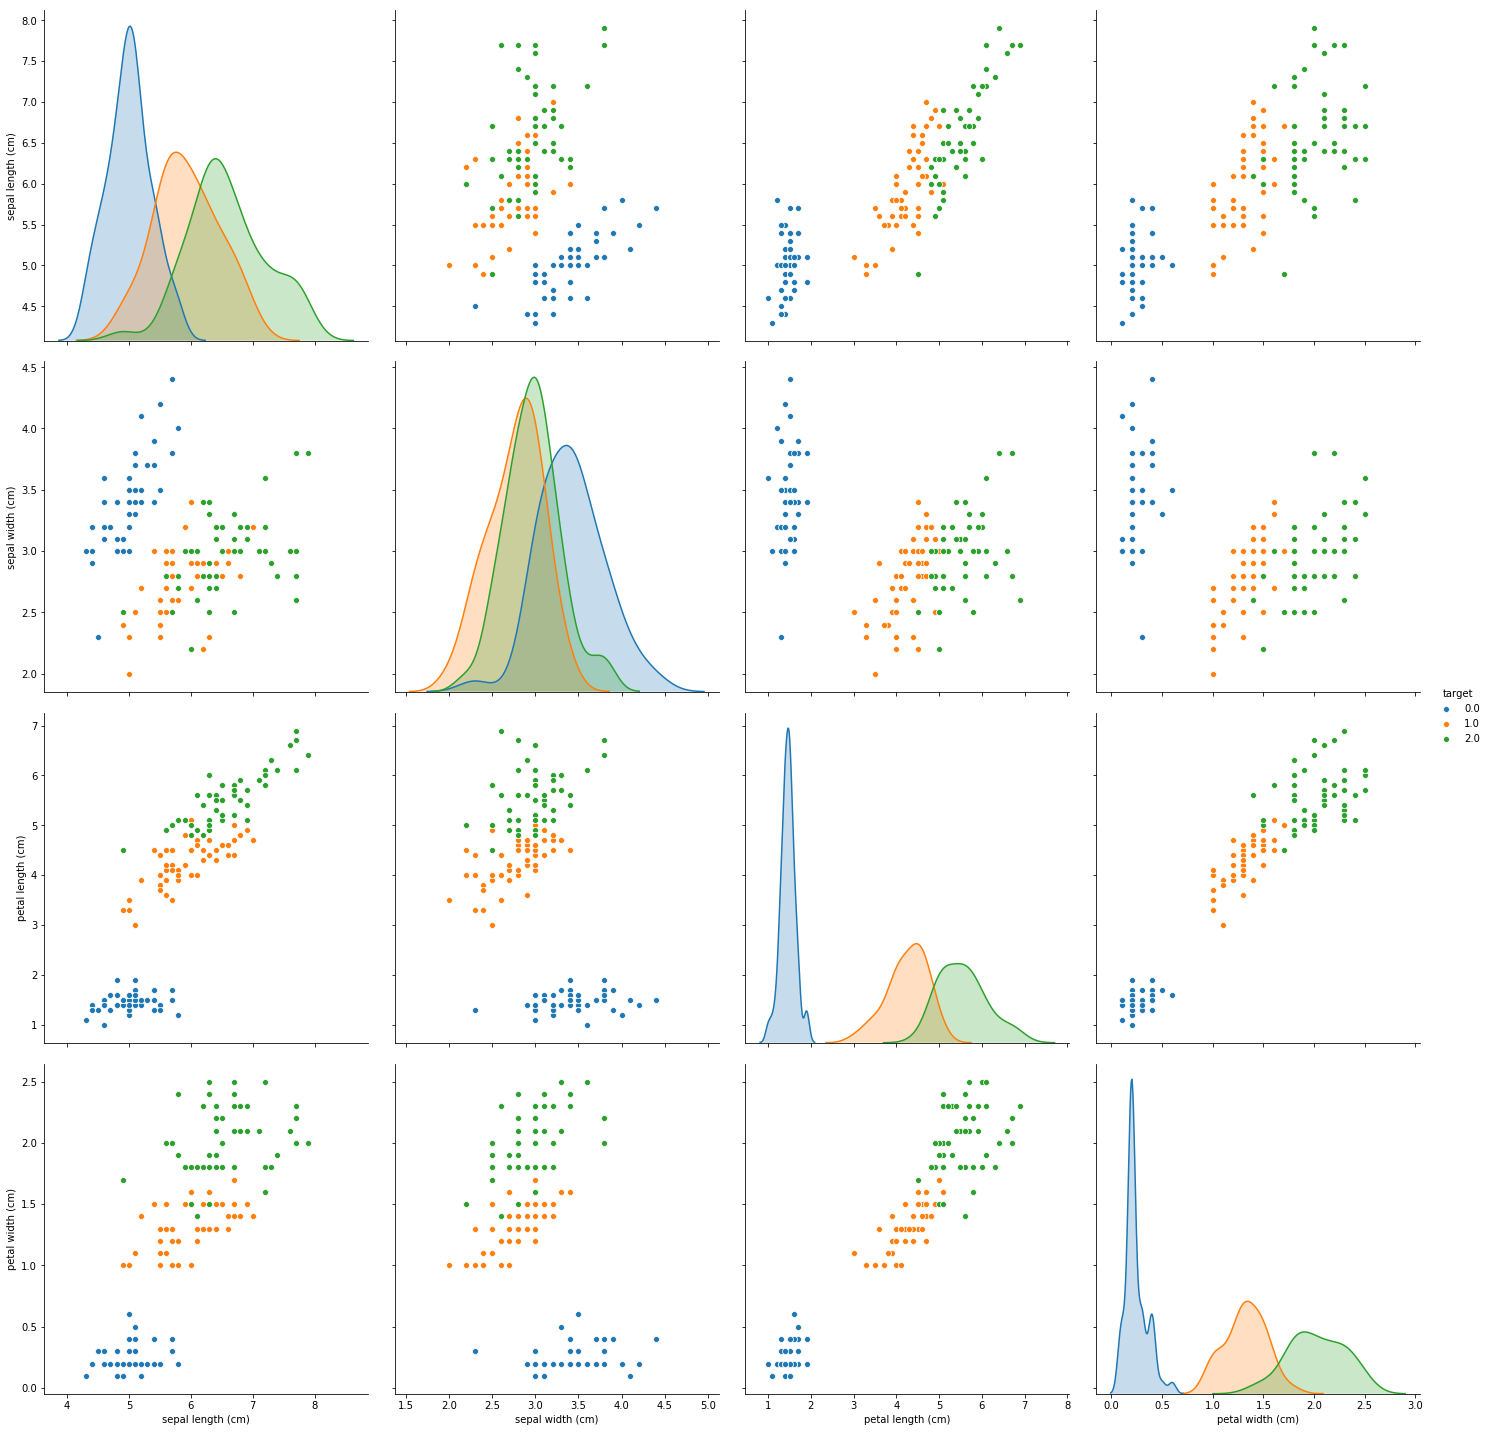

In [46]:
g = sns.pairplot(df, hue="target", x_vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
                 y_vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"], size=5)

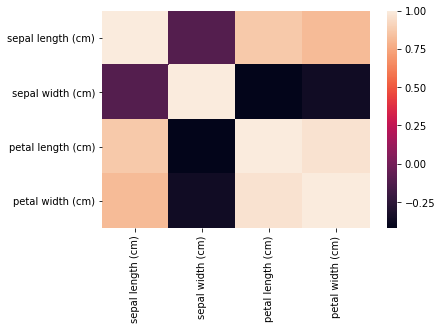

In [47]:
# plt.subplo
sns.heatmap(df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].corr())

In [78]:
X = df.drop('target', axis=1)  
y = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)  

In [79]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
y_pred = svclassifier.predict(X_test)  

In [75]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics
# print(confusion_matrix(y_test,y_pred))  
# print(classification_report(y_test,y_pred))  

In [81]:
metrics.accuracy_score(y_pred,y_test)

0.9555555555555556

In [82]:
list(zip(y_pred, y_test))


[(1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (2.0, 2.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (2.0, 2.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (2.0, 2.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (2.0, 2.0),
 (2.0, 2.0),
 (2.0, 2.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (2.0, 2.0),
 (2.0, 2.0),
 (2.0, 2.0),
 (1.0, 1.0),
 (1.0, 2.0),
 (0.0, 0.0),
 (2.0, 2.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (1.0, 1.0),
 (2.0, 2.0),
 (2.0, 2.0),
 (1.0, 1.0),
 (2.0, 2.0)]